dict_keys(['__header__', '__version__', '__globals__', 'zzz'])
-0.1463105018233302


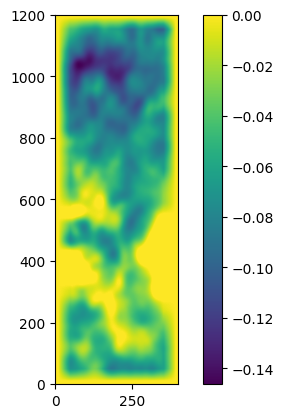

In [28]:
import scipy.io
import numpy as np
import matplotlib.pyplot as plt

# Load .mat file
data = scipy.io.loadmat("zzz.mat")

# Check available keys
print(data.keys())

# Extract variable (assuming it's named 'zzz' and is 2D)
var = data['zzz']  

print(np.min(var))

# Plot the 2D array
plt.imshow(var, cmap="viridis", origin="lower")
plt.colorbar()
plt.show()


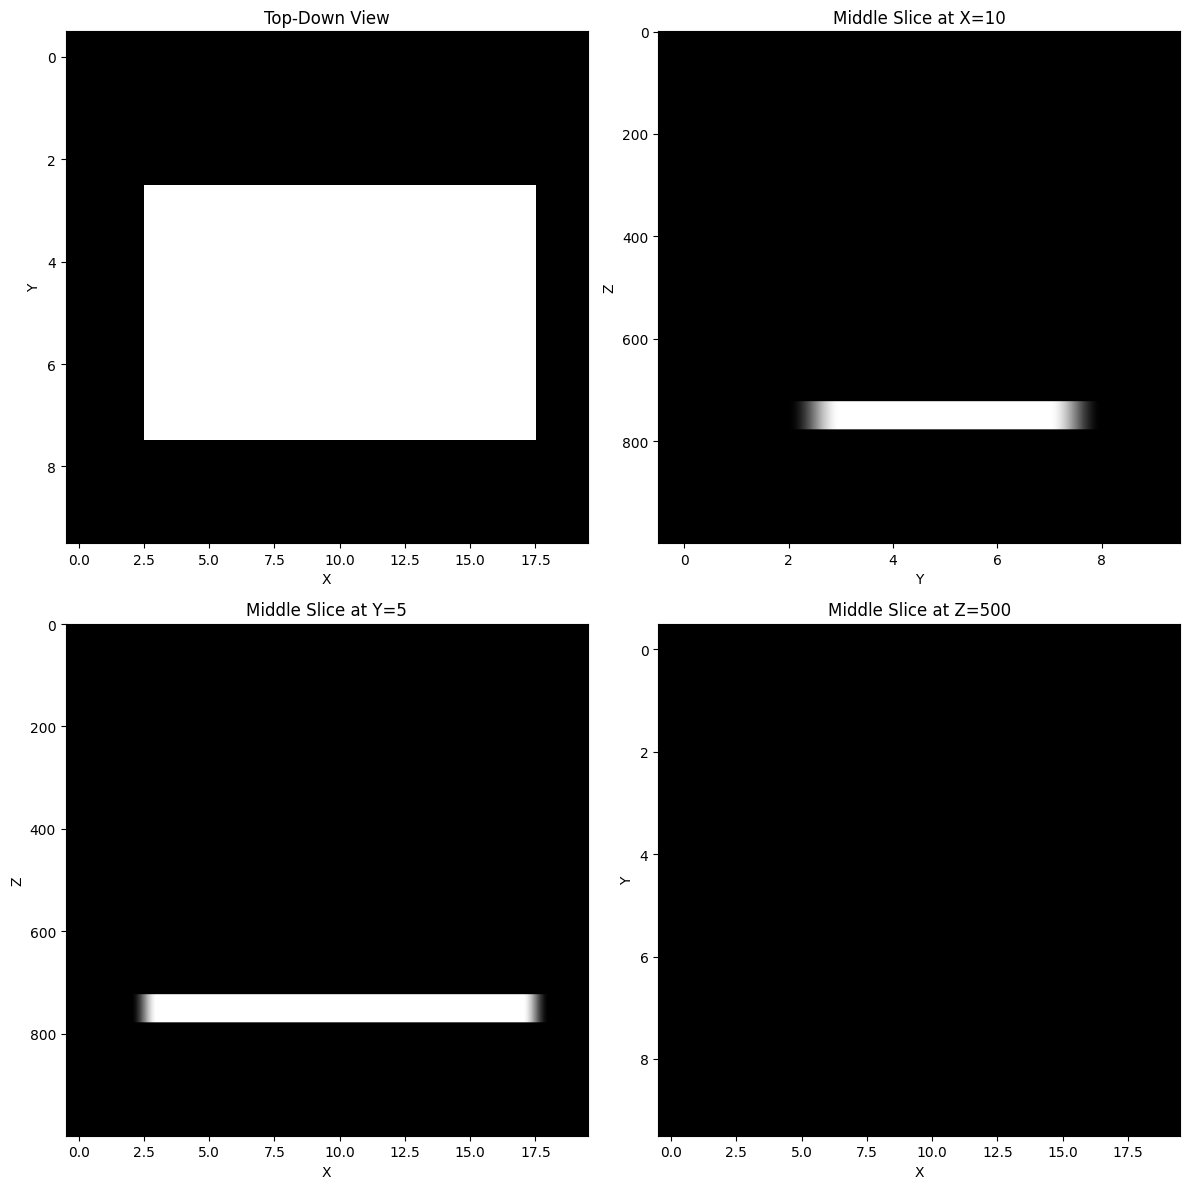

: 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the dimensions of your model
NX, NY, NZ = 20,10,1000  # Adjust these values to match your C code

# Function to read the binary .dat file
def read_model(filename):
    with open(filename, "rb") as file:
        data = np.fromfile(file, dtype=np.uint8)
    return data.reshape((NZ, NY, NX))

# Load the model
model = read_model("model.dat")

# Get a top-down view by summing or averaging along the depth (z-axis)
top_view = np.sum(model, axis=0)  # This collapses the Z dimension by summing

# Get middle slices along each dimension
mid_x_slice = model[:, :, NX // 2]
mid_y_slice = model[:, NY // 2, :]
mid_z_slice = model[NZ // 2, :, :]

# Plot all views
fig, axes = plt.subplots(2, 2, figsize=(12, 12))

# Top-down view
axes[0, 0].imshow(top_view, cmap='gray', aspect='auto')
axes[0, 0].set_title('Top-Down View')
axes[0, 0].set_xlabel('X')
axes[0, 0].set_ylabel('Y')

# Middle slice along the x-axis
axes[0, 1].imshow(mid_x_slice, cmap='gray', aspect='auto')
axes[0, 1].set_title(f'Middle Slice at X={NX // 2}')
axes[0, 1].set_xlabel('Y')
axes[0, 1].set_ylabel('Z')

# Middle slice along the y-axis
axes[1, 0].imshow(mid_y_slice, cmap='gray', aspect='auto')
axes[1, 0].set_title(f'Middle Slice at Y={NY // 2}')
axes[1, 0].set_xlabel('X')
axes[1, 0].set_ylabel('Z')

# Middle slice along the z-axis
axes[1, 1].imshow(mid_z_slice, cmap='gray', aspect='auto')
axes[1, 1].set_title(f'Middle Slice at Z={NZ // 2}')
axes[1, 1].set_xlabel('X')
axes[1, 1].set_ylabel('Y')

# Adjust layout
plt.tight_layout()
plt.show()


In [19]:
# Print some basic statistics
print("Model summary:")

# Total number of elements
total_elements = NX * NY * NZ
print(f"Total elements in the model: {total_elements}")

# Count of 1s and 0s
num_in_model = np.sum(model == 1)
num_not_in_model = np.sum(model == 0)
print(f"Number of 1s (in model): {num_in_model}")
print(f"Number of 0s (not in model): {num_not_in_model}")

# Percentage of 1s and 0s
print(f"Percentage of 1s: {100 * num_in_model / total_elements:.2f}%")
print(f"Percentage of 0s: {100 * num_not_in_model / total_elements:.2f}%")

# Min, max, and mean of the model
print(f"Minimum value in model: {np.min(model)}")
print(f"Maximum value in model: {np.max(model)}")
print(f"Mean value in model: {np.mean(model)}")

Model summary:
Total elements in the model: 8000000
Number of 1s (in model): 651222
Number of 0s (not in model): 7348778
Percentage of 1s: 8.14%
Percentage of 0s: 91.86%
Minimum value in model: 0
Maximum value in model: 1
Mean value in model: 0.08140275
